# More on Missing Data

## Introduction

Now that you've seen various methods of how to deal with missing data, its time to further discuss how to choose an appropriate methodology given a particular scenario. Commonly, many people will immediately turn to imputing the mean or median of a feature with missing values. This can be a valid and effective methodology, hence why it is standard, but does have caveats. For example, doing so will reduce the overall variance of your dataset which should be taken into account when performing subsequent analyses or training a machine learning algorithm on the dataset.

## Objectives

You will be able to: 

- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset   
- Determine how the distribution of data is affected by imputing values   
- Inspect data for duplicates or extraneous values and remove them

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


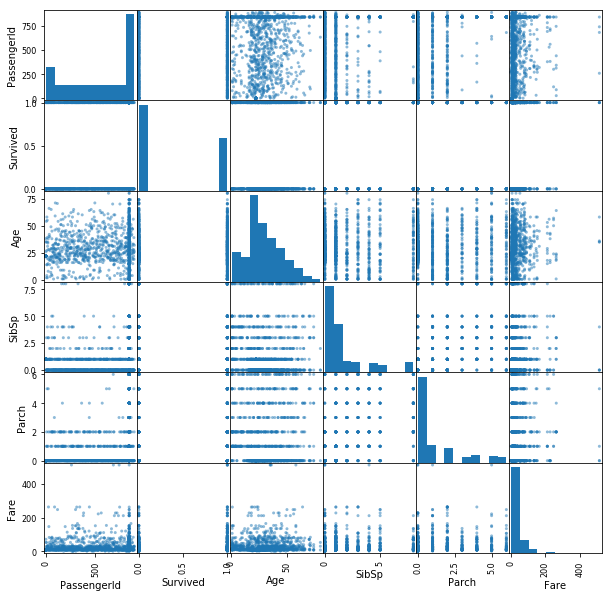

In [3]:
pd.plotting.scatter_matrix(df, figsize=(10,10));

## Check for missing data

Typically, the first step in checking for missing data is to simply use the `.info()` method. This gives us various information about the columns including their data type and the number of non-missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 12 columns):
PassengerId    1391 non-null float64
Survived       1391 non-null float64
Pclass         1391 non-null object
Name           1391 non-null object
Sex            1391 non-null object
Age            1209 non-null float64
SibSp          1391 non-null float64
Parch          1391 non-null float64
Ticket         1391 non-null object
Fare           1391 non-null float64
Cabin          602 non-null object
Embarked       1289 non-null object
dtypes: float64(6), object(6)
memory usage: 130.5+ KB


As you can see, `'Age'` and `'Cabin'` have a substantial amount of missing values, and `'Embarked'` has two extraneous missing values.

## Check for duplicates

While `df.info()` is a good initial spot check for missing values, it may not catch more subtle anomalies in the data such as duplicates. While these values are populated, it is always worrisome if we have observation rows with identical data.

In [5]:
duplicates = df[df.duplicated()]
print(len(duplicates))
duplicates.head()

100


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
891,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S
892,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S
893,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S
894,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S
895,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S


Similarly, if a feature such as `'PassengerId'` can be assumed to be unique, we can further check if there are duplicate rows based on a subset of the DataFrame columns.

In [6]:
duplicates = df[df.duplicated(subset='PassengerId')]
print(len(duplicates))
duplicates.tail()

500


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1386,839.0,0.0,?,"Rush, Mr. Alfred George John",male,47.0,0.0,4.0,113510,12.8750,B79,C
1387,839.0,1.0,2,"Skoog, Master. Harald",female,17.0,5.0,5.0,2671,17.4000,E49,NaN
1388,839.0,0.0,?,"Slocovski, Mr. Selman Francis",male,47.0,8.0,4.0,239854,7.0500,B49,NaN
1389,839.0,1.0,?,"Glynn, Miss. Mary Agatha",male,48.0,1.0,0.0,36866,8.6625,F G63,C
1390,839.0,0.0,?,"Sobey, Mr. Samuel James Hayden",male,14.5,3.0,4.0,2672,108.9000,C148,S


## Check for extraneous values

Sometimes, missing values are even further hidden within a dataset. For example, sometimes an entry such as `999999` is used for missing values, or an arbitrary date such as `12-01-1970` might be set for unknown dates. In general, doing a quick eyeball and previewing the top occurring values for each feature can help further tease out peculiarities in the dataset.

In [7]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

PassengerId 
 839.0    0.288282
1.0      0.072610
881.0    0.000719
757.0    0.000719
195.0    0.000719
Name: PassengerId, dtype: float64 


Survived 
 0.0    0.618979
1.0    0.381021
Name: Survived, dtype: float64 


Pclass 
 3    0.475198
1    0.219267
2    0.199137
?    0.106398
Name: Pclass, dtype: float64 


Name 
 Braund, Mr. Owen Harris                      0.072610
Stone, Mrs. George Nelson (Martha Evelyn)    0.003595
Maioni, Miss. Roberta                        0.002876
Butler, Mr. Reginald Fenton                  0.002876
Markun, Mr. Johann                           0.002876
Name: Name, dtype: float64 


Sex 
 male      0.641265
female    0.358735
Name: Sex, dtype: float64 


Age 
 22.0    0.106700
18.0    0.029777
24.0    0.029777
25.0    0.023987
30.0    0.023160
Name: Age, dtype: float64 


SibSp 
 0.0    0.473041
1.0    0.263120
2.0    0.060388
3.0    0.057513
8.0    0.055356
Name: SibSp, dtype: float64 


Parch 
 0.0    0.595255
1.0    0.125090
2.0    0.099209
4.0    0.0

You can see that we've uncovered another case of missing data that did not show up before! The `'Pclass'` feature has `?` for roughly 10% of the entries.

## Choosing a methodology

Now that you have some ideas of various methods for dealing with missing data, how do you choose which to use? The answer will depend on the scenario and specifics to the application itself. As a general rule of thumb, we tend towards imputing values rather than dropping them, as we wish to use as much information as possible. That said, larger gaps where data is missing can pose more substantial problems, and thereby warrant alternative approaches. We'll take a look at specific cases below in more detail, but here's a quick table of your options.

|         | Continuous          | Categorical  |
| ------------- |:-------------:| -----:|
| Delete      | Delete rows (observations) <br> Delete column (entire variable)| Delete rows (observations) <br> Delete column (entire variable)|
| Replace | replace using median/mean | replace using mode
| Keep | keep as NA (not possible for many ML algorithms) | NA category

## Imputing values

Imputing values is often a go to option when dealing with missing data. For example, if we are building a machine learning model with the data, many algorithms cannot handle missing values. By imputing data, we still get to use the full extent of the data at hand without having to throw away data, which, as you know, is an easy option.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 12 columns):
PassengerId    1391 non-null float64
Survived       1391 non-null float64
Pclass         1391 non-null object
Name           1391 non-null object
Sex            1391 non-null object
Age            1209 non-null float64
SibSp          1391 non-null float64
Parch          1391 non-null float64
Ticket         1391 non-null object
Fare           1391 non-null float64
Cabin          602 non-null object
Embarked       1289 non-null object
dtypes: float64(6), object(6)
memory usage: 130.5+ KB


## Considerations when imputing

When imputing missing values, keep in mind that you are influencing the distribution of this variable. For example, if you impute the mean, you will reduce the variance of that feature. 

## When to drop rows


Dropping rows is an appropriate choice if there are very few missing values to start with. After all, we do not wish to throw away troves of data if we have it, so cases in which there are larger occurrences of missing values, dropping all occurrences is typically inadvisable.

## When to drop columns

Dropping columns is typically a last case resort. That said, if a feature does not add predictive value to the machine learning algorithm driving your application, dropping said feature has no cost.

A few simple lines such as this can easily subset your DataFrame:  
~~~
cols_to_remove = ['col1', 'col2']
cols = [col for col in df.columns if col not in cols_to_remove]
subset = df[cols]
~~~

## Summary

In this lesson, we took a look at methods for identifying duplicate data as well as missing data that is not null, but filled with a placeholder value (such as `?`). We also began to discuss considerations when dealing with missing data, which you yourself will further grapple with in the upcoming lab.